# Previsão de "Box Office" de filmes do cinema ao redor do mundo
## Uma análise utilizando Linear Regression

### Workflow

    1. Formular a pergunta que define o problema;
    2. Coletar dados;
    3. Limpar dados;
    4. Explorar e visualizar;
    5. Treinar o algoritmo;
    6. Avaliar o algoritmo.

### 1. Podemos utilizar o orçamento utilizados em filmes para prever o lucro do mesmo?
    
Uma boa forma de formular uma pergunta para definir o problema é garantir que ela seja específica o suficiente ao ponto de podermos utilizar as informações que temos para realizar um teste com base no que estamos procurando. Neste caso, temos duas variáveis que podemos utilizar para realizar o teste sendo elas:
    
    a) O orçamento do filme;
    b) O lucro do filme pós produção.

Os dados coletados possuem ambas as informações, então podemos testar essa relação entre os números.

### 2. Coleta de dados.

Utilizando dados extraídos do site "The Numbers", vamos estudar a relação entre o orçamento dos filmes do cinema com o seu faturamento bruto, para isso, utilizaremos bibliotecas como Pandas, Numpy, Matplotlib e Sklearn para tratar os dados, criar DataFrames, visualizar gráficos e implementar o algoritmo de regressão linear.

### 3. Limpeza dos dados.
 Para este projeto em específico, os dados utilizados foram tratados fora do Jupyter, utilizando o Google Sheets, portanto, o arquivo .CSV que será utilizado daqui pra frente irá conter apenas duas colunas, production_budget_usd e worldwide_gross_usd, referentes ao custo e lucro de cada obra.

Fonte dos dados: https://www.the-numbers.com/movie/budgets/all

In [1]:
# Importamos as bilbiotecas necessárias para realizar o projeto:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
dados_cinema = pd.read_csv('dados_processados.csv') # Criando DataFrame com o arquivo csv

### 4. Explorar e visualizar

A partir daqui, queremos entender o que estes dados dizem, e uma boa forma de interpretar os dados é a utilização de gráficos, pois como estamos lidando com um volume muito grande de dados, é impossível tirar insights apenas olhando para linhas e colunas.

Depois de carregar o arquivo csv e armazená-lo em um DF, podemos visualizar as primeiras linhas de dados:

In [3]:
dados_cinema.head()

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527


Checamos algumas informações que podem ser importantes para nossa análise:

In [4]:
dados_cinema.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


Vamos renomear as colunas de nosso DataFrame para uma melhor interpretação do leitor:

In [5]:
dados_cinema.rename(columns={'production_budget_usd': 'orcamento_filme_dolar', 'worldwide_gross_usd': 'lucro_bruto_mundial_dolar'}, inplace=True)

Como queremos analizar a relação entre uma coluna de dados e outra, criamos um DF de cada coluna:

In [6]:
X = pd.DataFrame(dados_cinema, columns=['orcamento_filme_dolar'])
y = pd.DataFrame(dados_cinema, columns=['lucro_bruto_mundial_dolar'])

Agora podemos fazer um gráfico do tipo Scatter para enxergarmos alguma possível relação entre os valoresde X e y

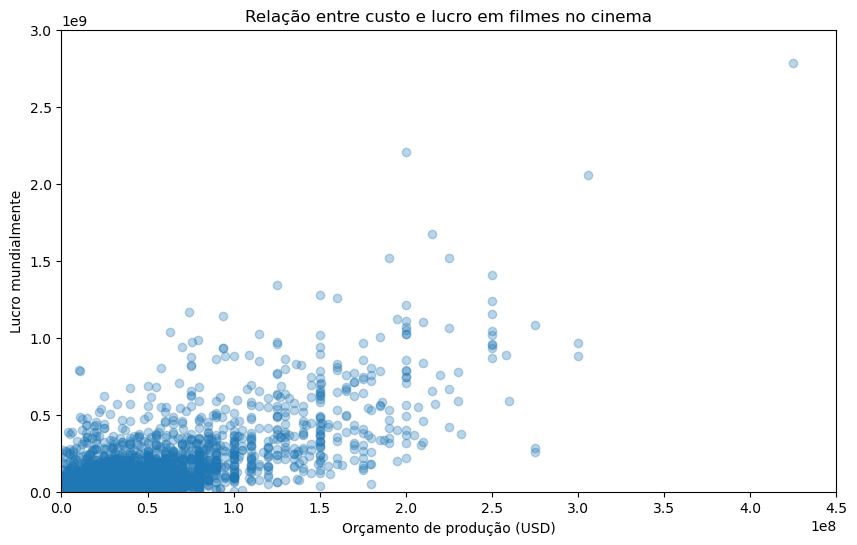

In [7]:
plt.figure(figsize=(10, 6)) # Determinamos um tamanho para nosso gráfico
plt.scatter(X, y, alpha=0.3) # Modificamos a transparência dos pontos do gráfico, para analizar agrupamento de valores
plt.title('Relação entre custo e lucro em filmes no cinema') # Adicionamos um título e etiqueta para X e y
plt.xlabel('Orçamento de produção (USD)')
plt.ylabel('Lucro mundialmente')
plt.ylim(0, 3e9)
plt.xlim(0, 450e6)
plt.show()

### 5. Training the algorithm

Agora é o momento onde utilizamos o algoritmo de regressão linear para responder a nossa questão: Podemos utilizar o orçamento de filmes para prever o lucro bruto do mesmo?

In [8]:
regressao = LinearRegression()
regressao.fit(X, y)

LinearRegression()

### Theta 1

In [9]:
regressao.coef_ # theta_1

array([[3.11150918]])

O que podemos entender com o valor obtido para theta 1? Podemos dizer que para cada 1 dolar gasto na produção do filme -com base em nossa análise dos dados utilizados, houve um retorno de 3.1 vezes mais o valor gasto. O que inicialmente parece um valor interessante.

### Theta 0

In [10]:
regressao.intercept_ #intercept

array([-7236192.72913963])

Já para theta 0, o nosso resultado se mostra um pouco menos realista, por exemplo, isso significaria que se gastássemos 1 dolar para a produção de nosso filme:

h0(x) = -7,236,912 + 3.1 * 1

Teríamos um prejuízo de 7 milhões, o que é realisticamente impossível.
Mas isso não significa que nossa análise é descartável.

Vamos visualizar mais uma vez o gráfico, mas dessa vez com uma linha que representa a nossa hipótese:

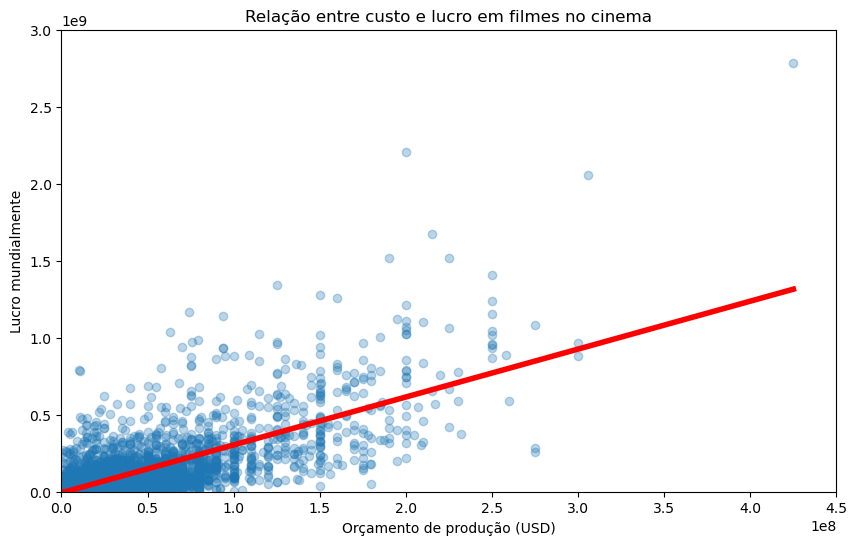

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3)
plt.plot(X, regressao.predict(X), color='red', linewidth=4)
plt.title('Relação entre custo e lucro em filmes no cinema')
plt.xlabel('Orçamento de produção (USD)')
plt.ylabel('Lucro mundialmente')
plt.ylim(0, 3e9)
plt.xlim(0, 450e6)
plt.show()

### 6. Avaliando o algoritmo

In [12]:
regressao.score(X, y)

0.5496485356985727

Podemos ver que o nosso algoritmo teve uma "precisão" de quase 55% em sua predição, o que é um valor até interessante, se levarmos em conta que apenas 2 parâmetros foram utilizados para esta predição, e se adicionarmos mais atributos como por exemplo o tempo de produção de cada filme, ou as notas de críticos para cada um? Certamente esta previsão estaria um pouco mais próxima da realidade, já que o estudo feito aqui é uma redução dramática de interferências externas.